🌟 Exercise 1 : Understanding the problem and Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support

Load the diabetes dataset and explore it.

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df_copy = df.copy()
print(df_copy.shape)
print(df_copy.head())
print(df_copy.describe())
print(df_copy.dtypes)


(100000, 9)
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  
                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
m

In [3]:
# Handle duplicates
duplicate_rows_data = df_copy[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [4]:
df_copy = df_copy.drop_duplicates()

In [5]:
# Loop through each column and count the number of distinct values
for column in df_copy.columns:
    num_distinct_values = len(df_copy[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [6]:
# Checking null values
print(df_copy.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [7]:
# Convert categorical columns if necessary
category_mappings = {
    'gender': {'Female': 0, 'Male': 1, 'Other': 2},
    'smoking_history': {'never': 0, 'No Info': 1, 'former': 2, 'not current': 3, 'current': 4, 'ever': 5}
}
df_copy.replace(category_mappings, inplace=True)

<ipython-input-7-97d383fe3955>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy.replace(category_mappings, inplace=True)


In [8]:
# Summary statistics of cleaned
display(df_copy.describe())


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,0.416065,41.794326,0.077601,0.040803,1.324694,27.321461,5.532609,138.218231,0.088220
std,0.493287,22.462948,0.267544,0.197833,1.462943,6.767716,1.073232,40.909771,0.283616
min,0.000000,0.080000,0.000000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,0.000000,43.000000,0.000000,0.000000,1.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,59.000000,0.000000,0.000000,2.000000,29.860000,6.200000,159.000000,0.000000
max,2.000000,80.000000,1.000000,1.000000,5.000000,95.690000,9.000000,300.000000,1.000000


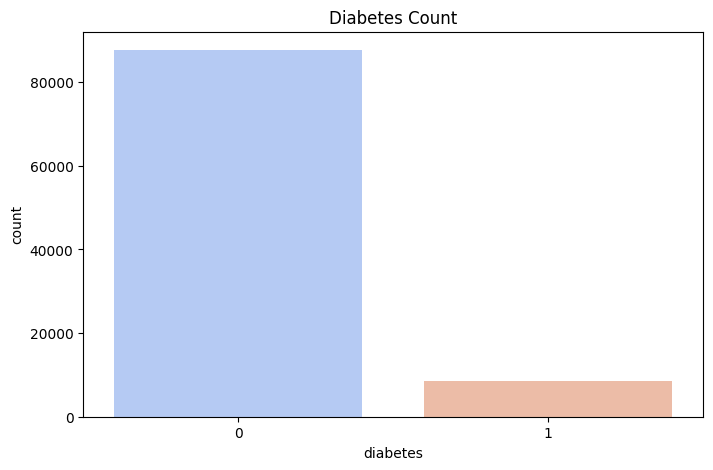

In [9]:
# starting visualizations
plt.figure(figsize=(8,5))
sns.countplot(data=df_copy, x='diabetes', hue='diabetes', palette='coolwarm', legend=False)
plt.title('Diabetes Count')
plt.show()

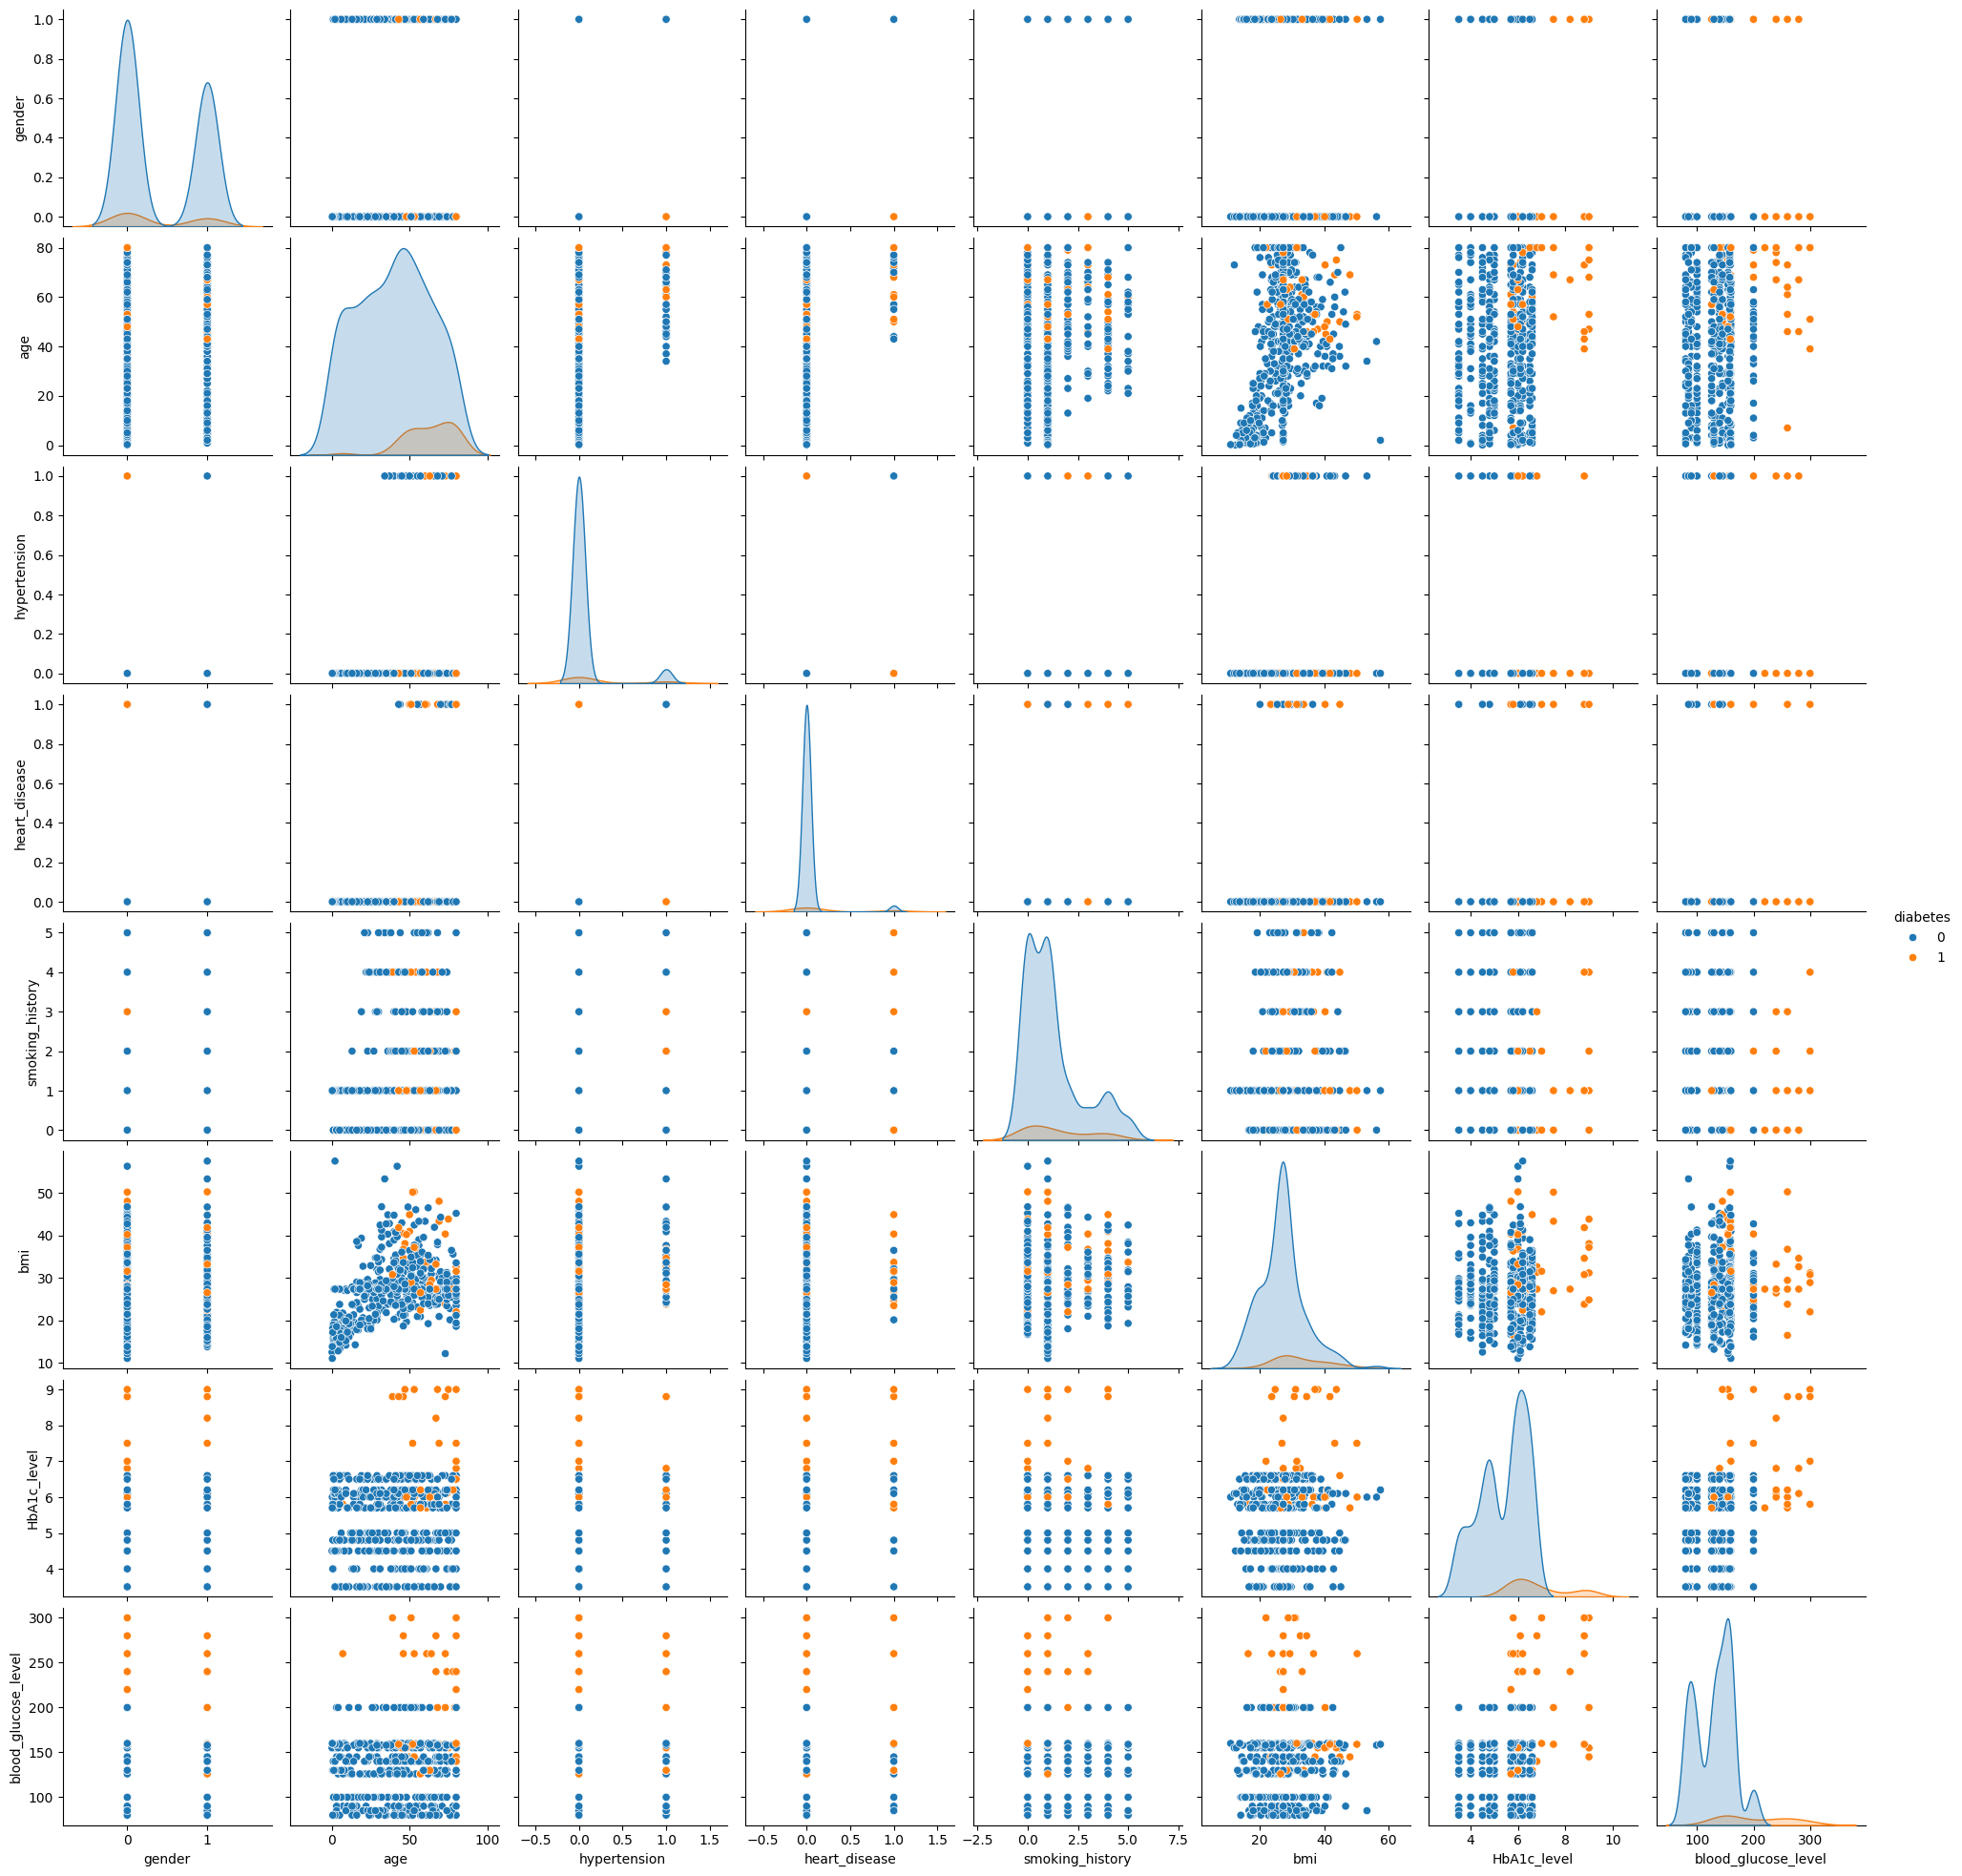

In [10]:
# Pairplot to explore relationships between features
sns.pairplot(df_copy.sample(500), hue='diabetes', diag_kind='kde')
plt.show()

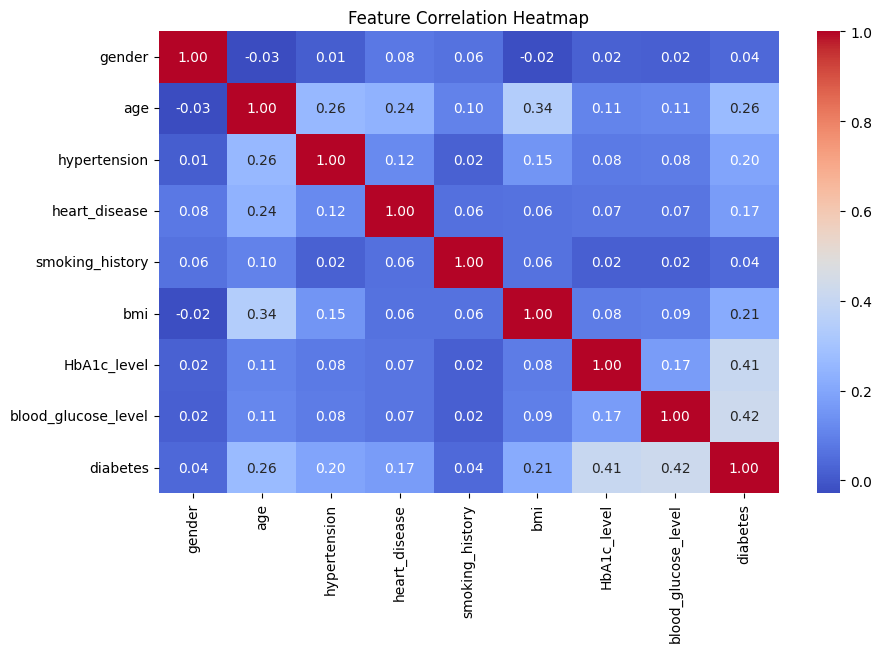

In [11]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
numeric_df = df_copy.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()


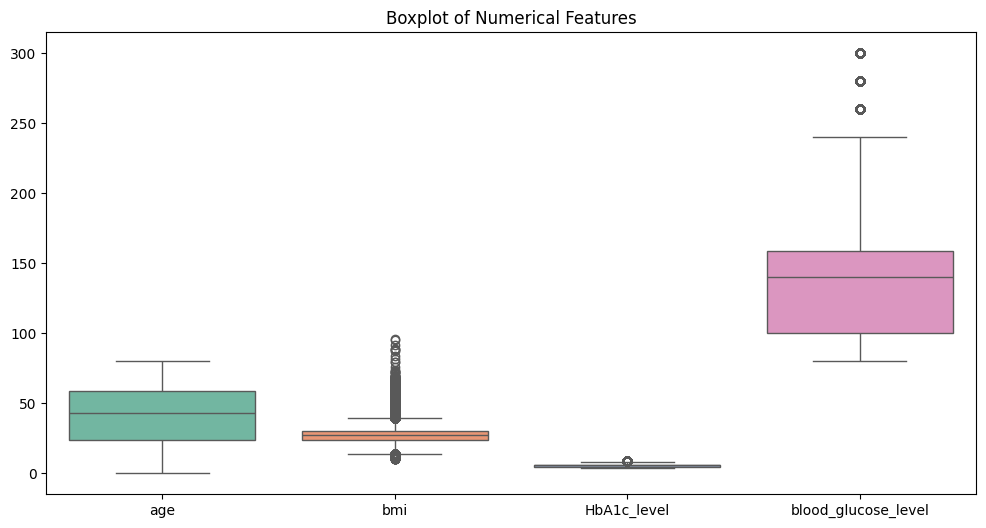

In [12]:
# Check for outliers using boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=df_copy[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']], palette='Set2')
plt.title('Boxplot of Numerical Features')
plt.show()

In [13]:
# Display cleaned dataset info
display(df_copy.info())

<class 'pandas.core.frame.DataFrame'>
Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int64  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int64  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 7.3 MB


None

In [14]:
# Count positive and negative diabetes cases
positive_cases = df_copy['diabetes'].sum()
negative_cases = len(df_copy) - positive_cases

print(f"Positive cases: {positive_cases}")
print(f"Negative cases: {negative_cases}")

Positive cases: 8482
Negative cases: 87664


In [15]:
# Split the data into training and testing sets
X = df_copy.drop(columns=['diabetes'])  # Features
y = df_copy['diabetes']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 76916
Testing set size: 19230


🌟 Exercise 2 : Model Picking and Standardization
Which classification model can we use in this problem and why ?
Do we need to standardize the data ? If yes, use .StandardScaler()

I would want to use random forest because its a decision tree that uses an average of multiple trees , it handles larger datasets and works with mixed datatypes. we also do not need to standardize. **i ran it anyway because I was curious**

In [16]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predict on test data
y_pred = rf_model.predict(X_test)

In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Random Forest Accuracy: 0.9696
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     17534
           1       0.95      0.69      0.80      1696

    accuracy                           0.97     19230
   macro avg       0.96      0.84      0.89     19230
weighted avg       0.97      0.97      0.97     19230

Confusion Matrix:
 [[17472    62]
 [  522  1174]]


🌟 Exercise 3 : Model Training
We will use, the logistic regression model, Train it.

In [19]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 76916
Testing set size: 19230


In [20]:
# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [21]:
# Make predictions using Logistic Regression
y_pred_log = log_reg.predict(X_test_scaled)

In [22]:
# Evaluate the Logistic Regression model
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Sample Predictions (Logistic Regression):", y_pred_log[:10])

Logistic Regression Accuracy: 0.8840
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.88      0.93     17534
           1       0.42      0.88      0.57      1696

    accuracy                           0.88     19230
   macro avg       0.71      0.88      0.75     19230
weighted avg       0.94      0.88      0.90     19230

Confusion Matrix:
 [[15516  2018]
 [  212  1484]]
Sample Predictions (Logistic Regression): [1 0 0 0 0 0 0 0 0 0]


🌟 Exercise 4 : Evaluation Metrics
Plot the accuracy score and comment the results.
Plot the confusion matrix and comment the results.
Plot the Recall, precision, F1-score and comment the results.

**I ploted both scores because i ran a random forest as well**

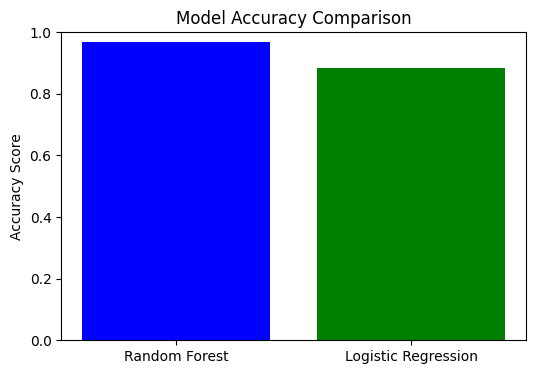


The Random Forest model performs better overall with a higher accuracy, 
whereas the Logistic Regression model struggles with class imbalance, 
particularly in predicting positive diabetes cases.


In [23]:
# Plot accuracy scores
plt.figure(figsize=(6, 4))
plt.bar(['Random Forest', 'Logistic Regression'], [accuracy, accuracy_log], color=['blue', 'green'])
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

print("\nThe Random Forest model performs better overall with a higher accuracy, \nwhereas the Logistic Regression model struggles with class imbalance, \nparticularly in predicting positive diabetes cases.")

In [24]:
# Calculate Precision, Recall, and F1-score for Logistic Regression
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred_log, average='binary')

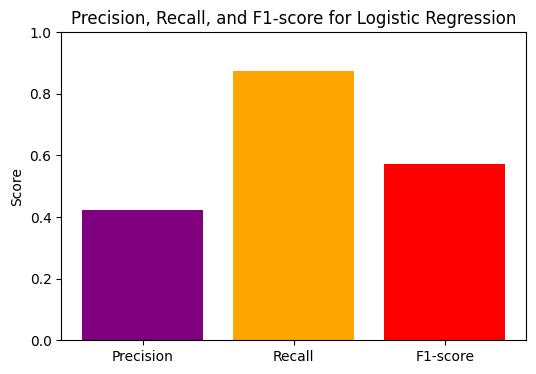


Logistic Regression Metrics:

Precision: 0.4238
Recall: 0.8750
F1-score: 0.5710



In [25]:
# Plot Precision, Recall, and F1-score
plt.figure(figsize=(6,4))
metrics = ['Precision', 'Recall', 'F1-score']
values = [precision, recall, f1]
plt.bar(metrics, values, color=['purple', 'orange', 'red'])
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score for Logistic Regression')
plt.ylim(0, 1)
plt.show()

print("\nLogistic Regression Metrics:\n")
print(f"Precision: {precision:.4f}\nRecall: {recall:.4f}\nF1-score: {f1:.4f}\n")

🌟 Exercise 5 : Visualizing the performance of our model
Visualize the decision boundary with accuracy information.

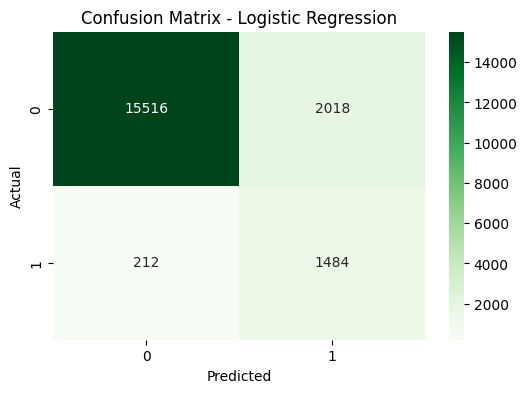

The high true negative rate indicates that the model is good at recognizing non-diabetic cases. 
The 2,018 false positives suggest that the model may misclassify healthy individuals as diabetic. 
The false negative count (212) is relatively low, meaning the model is not missing too many actual diabetes cases. 
Precision for the positive class (diabetes) is lower, meaning some non-diabetic cases are misclassified as diabetic. 
Recall for the positive class is higher (0.88), meaning the model successfully detects most diabetes cases.


In [26]:
# Plot Confusion Matrix for Logistic Regression
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print("The high true negative rate indicates that the model is good at recognizing non-diabetic cases. \nThe 2,018 false positives suggest that the model may misclassify healthy individuals as diabetic. \nThe false negative count (212) is relatively low, meaning the model is not missing too many actual diabetes cases. \nPrecision for the positive class (diabetes) is lower, meaning some non-diabetic cases are misclassified as diabetic. \nRecall for the positive class is higher (0.88), meaning the model successfully detects most diabetes cases.")

🌟 Exercise 6 : ROC Curve
Plot the ROC Curve using this code template available on this link

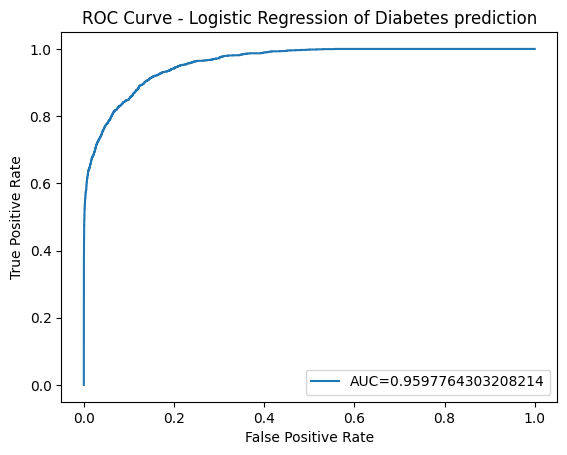

In [28]:
from sklearn import metrics

# Get predicted probabilities for the positive class (diabetes)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[::,1] # Use X_test_scaled

# Calculate FPR, TPR, and thresholds
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

# Calculate AUC (Area Under the Curve)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Create ROC curve
plt.plot(fpr, tpr, label="AUC=" + str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve - Logistic Regression of Diabetes prediction')
plt.legend(loc=4)
plt.show()